In [1]:
from IPython.display import display, Image

# 개별 종목 시세
* 시장정보 → 주식 → 종목정보 → 일자별 시세

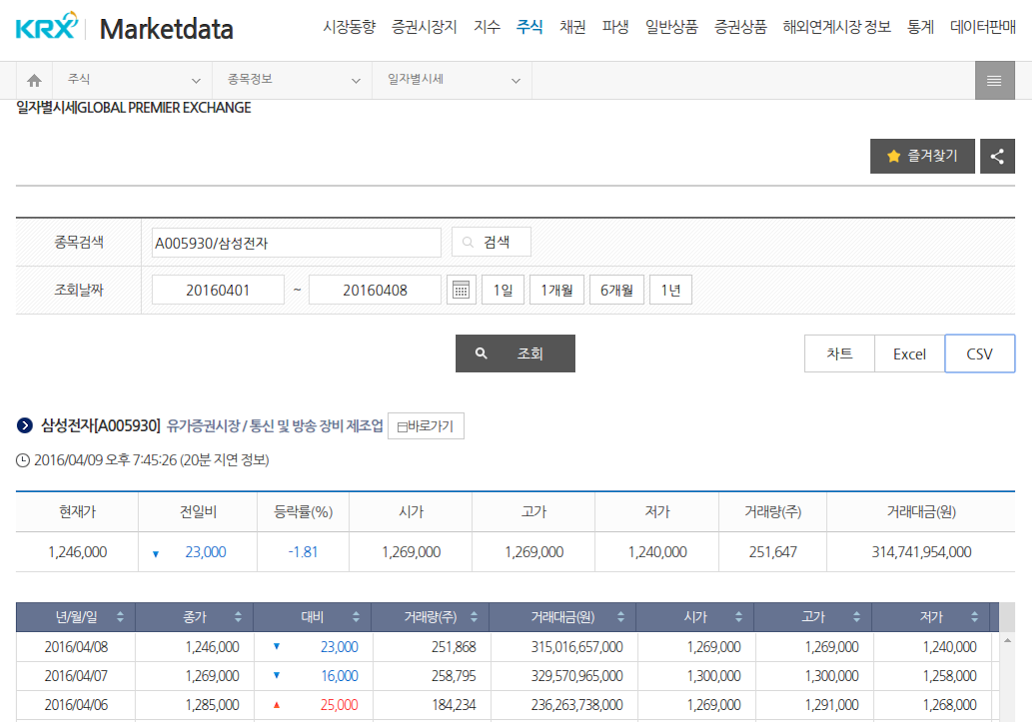

In [9]:
display( Image('images/price-005930.png'))

# 종목 코드

## 국제증권식별번호(ISIN)
* 12자리, 예) 삼성전자: KR7005930003
* 국가코드(KR), 기본코드(9자리), 검사코드(1자리)
* 기본코드(9자리): 속성코드(1자리), 발행체고유코드(5자리), 종목구분코드(3자리)

## 한국거래소 단축코드 부여 방식
* 주권의 경우 7자리, 예) 삼성전자: A005930
* A는 주권을 뜻하며 생략하고 뒤쪽 6자리만 사용

# 개별종목 시세
개별 종목의 특정 기간의 시세를 CSV로 다운로드
* isu_cd: ISIN 코드, 예) KR7005930003 (삼성전자) 
* fromdate: 시작일
* todate: 종료일

In [2]:
import requests

# STEP 01: Generate OTP
gen_otp_url = "http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx"
gen_otp_data = {
    'name':'fileDown',
    'filetype':'csv',
    'url':'MKD/04/0402/04020100/mkd04020100t3_02',
    'isu_cd':'KR7005930003',
    'fromdate':'20151001',
    'todate':'20151231',
}

r = requests.post(gen_otp_url, gen_otp_data)
code = r.text

# STEP 02: download
down_url = 'http://file.krx.co.kr/download.jspx'
down_data = {
    'code': code,
}

r = requests.post(down_url, down_data)
r.encoding = "utf-8-sig"
with open("A005930.csv", 'wt') as f:
    f.write(r.text)
    

In [3]:
! tail A005930.csv

2015/10/15,"1,269,000","15,000","248,503","316,552,178,152","1,244,000","1,282,000","1,243,000","186,922,859","147,299,337"
2015/10/14,"1,254,000","2,000","175,051","218,549,433,000","1,248,000","1,260,000","1,237,000","184,713,369","147,299,337"
2015/10/13,"1,252,000","-8,000","198,000","248,520,230,556","1,260,000","1,272,000","1,248,000","184,418,770","147,299,337"
2015/10/12,"1,260,000","-10,000","378,974","476,484,062,000","1,260,000","1,263,000","1,247,000","185,597,165","147,299,337"
2015/10/08,"1,270,000","19,000","570,677","720,360,301,793","1,250,000","1,279,000","1,250,000","187,070,158","147,299,337"
2015/10/07,"1,251,000","100,000","799,502","975,337,951,000","1,198,000","1,252,000","1,186,000","184,271,471","147,299,337"
2015/10/06,"1,151,000","36,000","382,987","438,862,988,000","1,130,000","1,155,000","1,127,000","169,541,537","147,299,337"
2015/10/05,"1,115,000","-4,000","241,935","271,768,271,104","1,119,000","1,131,000","1,115,000","164,238,761","147,299,337"
2015/10

In [4]:
import pandas as pd
import csv

df = pd.read_csv('A005930.csv')
df.tail()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
58,2015/10/07,"1,251,000","100,000","799,502","975,337,951,000","1,198,000","1,252,000","1,186,000","184,271,471","147,299,337"
59,2015/10/06,"1,151,000","36,000","382,987","438,862,988,000","1,130,000","1,155,000","1,127,000","169,541,537","147,299,337"
60,2015/10/05,"1,115,000","-4,000","241,935","271,768,271,104","1,119,000","1,131,000","1,115,000","164,238,761","147,299,337"
61,2015/10/02,"1,119,000","-15,000","274,302","307,616,065,774","1,112,000","1,133,000","1,112,000","164,827,958","147,299,337"
62,2015/10/01,"1,134,000",30,"241,041","273,836,996,185","1,140,000","1,145,000","1,121,000","167,037,448","147,299,337"


In [6]:
df = pd.read_csv('A005930.csv', thousands=',', parse_dates=[0], usecols=['년/월/일',  '종가', '거래량(주)', '시가', '고가', '저가'])
df.columns = ['date', 'close', 'volume', 'open', 'hign', 'low']
df.set_index('date', inplace=True)
display( 'item counts: %d' % len(df) )
display( df.head() )

'item counts: 63'

,close,volume,open,hign,low
date,,,,,
2015-12-30,1260000,203958,1260000,1272000,1254000
2015-12-29,1254000,232944,1265000,1266000,1241000
2015-12-28,1266000,227230,1285000,1289000,1266000
2015-12-24,1285000,156151,1295000,1300000,1285000
2015-12-23,1295000,207148,1292000,1299000,1282000


In [7]:
%matplotlib inline

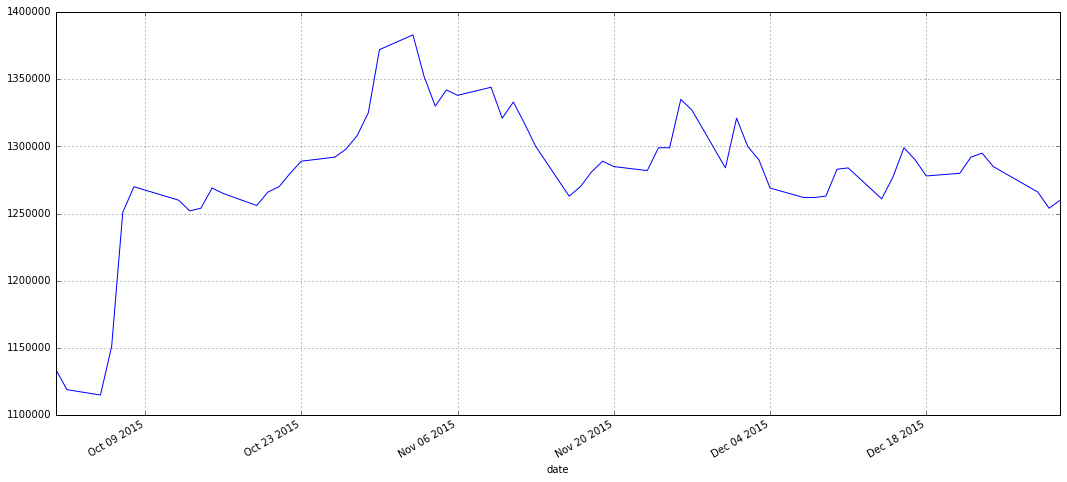

In [8]:
df['close'].plot(figsize=(18,8), grid=True)